#Clustering Air Passengers

The dataset was labelled  "clustering" in https://data.world/data-society/air-traffic-passenger-data 

#**1. Importing Data and libraries**

Data: https://data.sfgov.org/resource/rkru-6vcg.json

In [1]:
!pip install sodapy

In [2]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sodapy import Socrata
client = Socrata("data.sfgov.org", None)
results = client.get("rkru-6vcg", limit=2000)
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.to_csv("Air_traffic_data.csv")

In [5]:
results_df.head()

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count
0,202012,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,6916
1,202012,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,International,G,2602
2,202012,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Deplaned,Other,International,A,956
3,202012,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Enplaned,Other,International,A,857
4,202012,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Deplaned,Other,Terminal 3,F,2086


#**2. EDA**

##2.1 Dataset As a whole

In [6]:
results_df.shape

(2000, 12)

In [7]:
results_df.columns

Index(['activity_period', 'operating_airline', 'operating_airline_iata_code',
       'published_airline', 'published_airline_iata_code', 'geo_summary',
       'geo_region', 'activity_type_code', 'price_category_code', 'terminal',
       'boarding_area', 'passenger_count'],
      dtype='object')

Check for missing values

In [8]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   activity_period              2000 non-null   object
 1   operating_airline            2000 non-null   object
 2   operating_airline_iata_code  1989 non-null   object
 3   published_airline            2000 non-null   object
 4   published_airline_iata_code  1989 non-null   object
 5   geo_summary                  2000 non-null   object
 6   geo_region                   2000 non-null   object
 7   activity_type_code           2000 non-null   object
 8   price_category_code          2000 non-null   object
 9   terminal                     2000 non-null   object
 10  boarding_area                2000 non-null   object
 11  passenger_count              2000 non-null   object
dtypes: object(12)
memory usage: 187.6+ KB


In [9]:
results_df['passenger_count']= results_df['passenger_count'].astype("int")
results_df['activity_period']= pd.to_datetime(results_df['activity_period'], format ="%Y%m")

In [10]:
results_df.sample(2)

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count
257,2020-10-01,Frontier Airlines,F9,Frontier Airlines,F9,Domestic,US,Deplaned,Low Fare,International,A,13355
413,2020-08-01,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,37475


In [11]:
len(set(results_df['operating_airline']))

59

In [12]:
len(set(results_df['operating_airline_iata_code']))

59

we can drop one of the two columns as each operating airline has only one iata_code and one iata code is assigned to onnlu one operating airline

In [13]:
results_df = results_df.drop(columns = ['operating_airline_iata_code'])

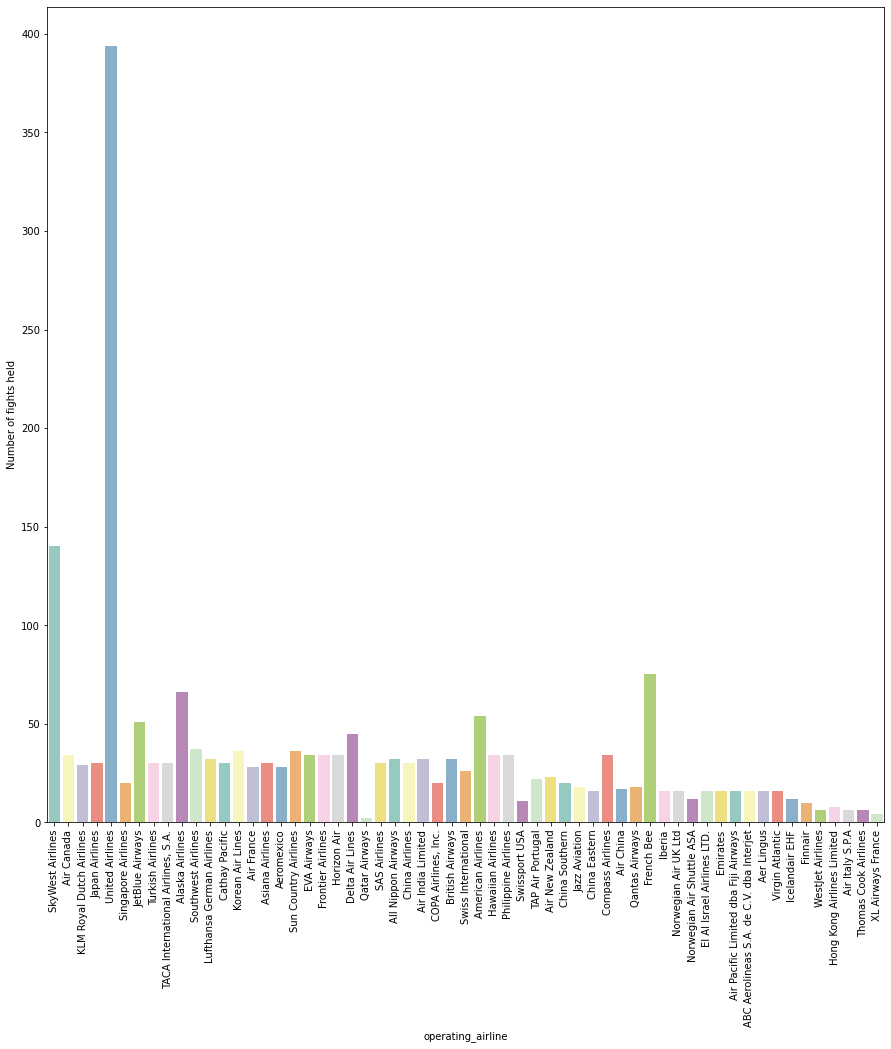

In [14]:
plt.figure(figsize = (15,15))
sns.countplot(x = "operating_airline", palette = "Set3",data = results_df)
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

In [15]:
len(set(results_df['published_airline']))

55

In [16]:
len(set(results_df['published_airline_iata_code']))

55

In [17]:
results_df = results_df.drop(columns = ['published_airline_iata_code'])

we can drop one of the two columns as each published airline has only one iata_code and one iata code is assigned to only one published airline

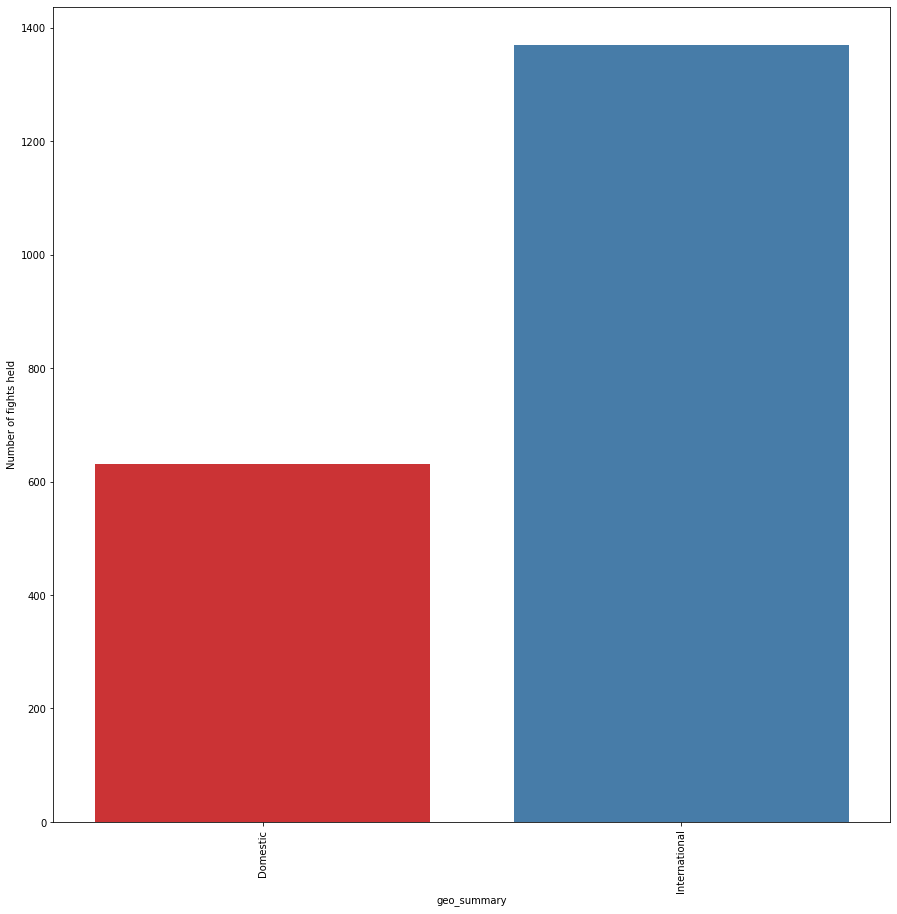

In [18]:
plt.figure(figsize = (15,15))
sns.countplot(x = "geo_summary", palette = "Set1",data = results_df)
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

In [19]:
len(set(results_df['geo_region']))

8

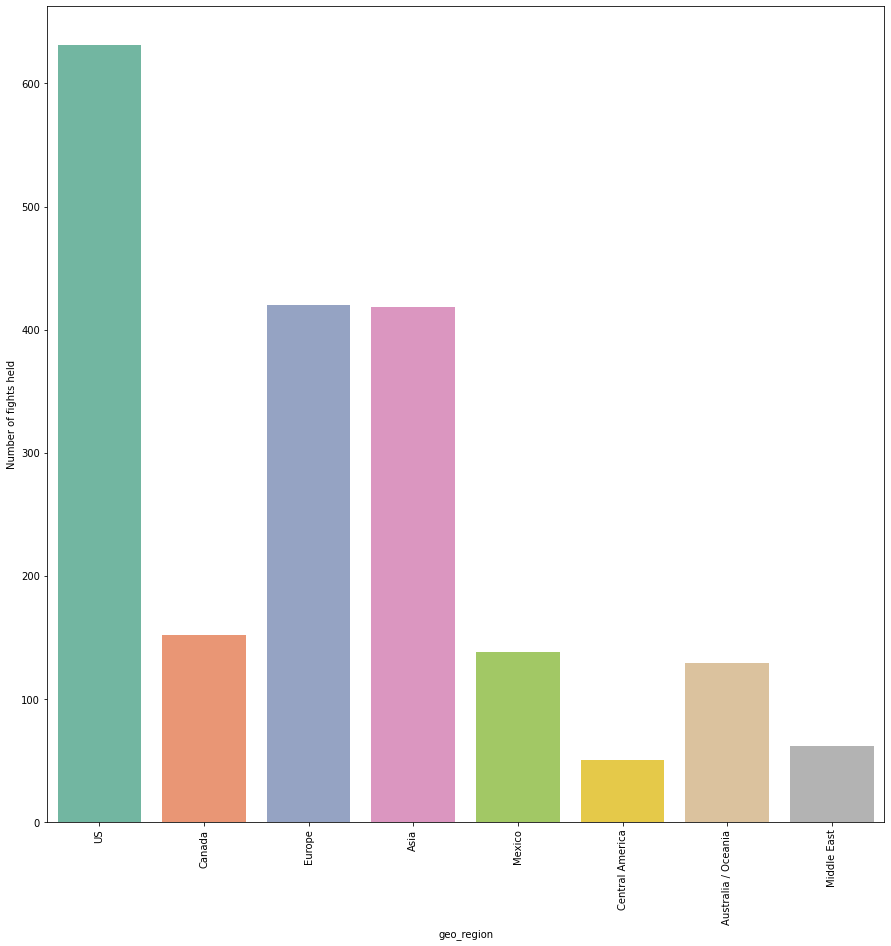

In [20]:
plt.figure(figsize = (15,15))
sns.countplot(x = "geo_region", palette = "Set2",data = results_df)
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

In [21]:
len(set(results_df['activity_type_code']))

3

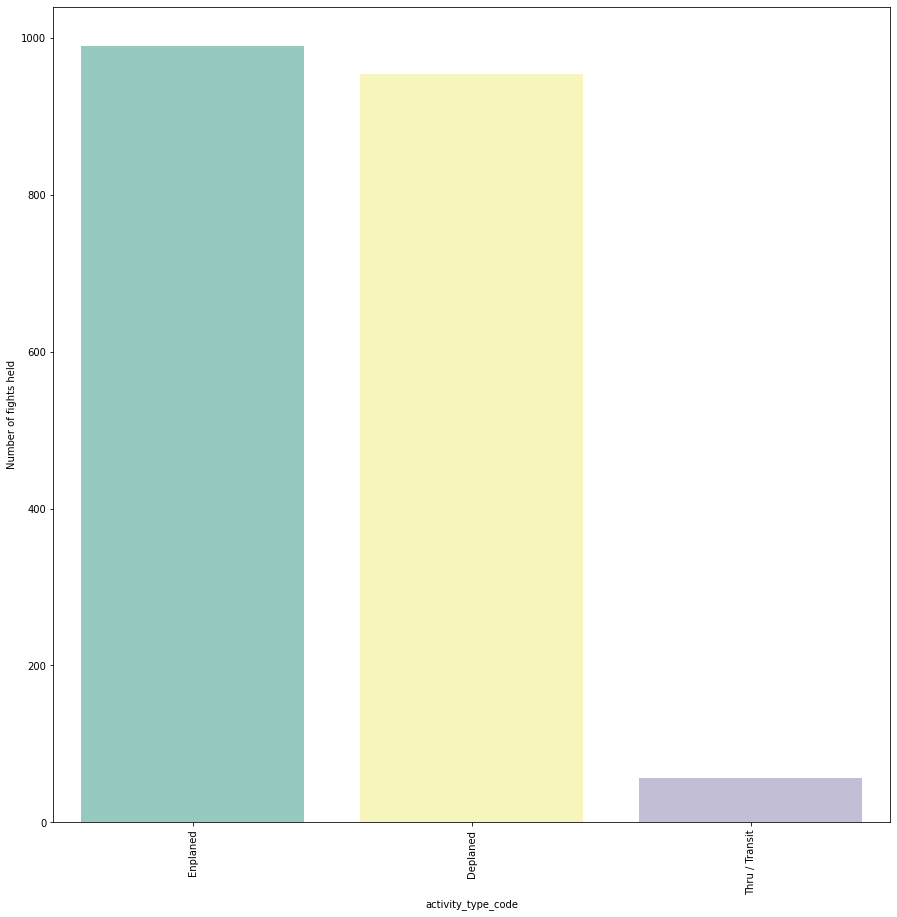

In [22]:
plt.figure(figsize = (15,15))
sns.countplot(x = "activity_type_code", palette = "Set3",data = results_df)
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

In [23]:
set(results_df['price_category_code'])

{'Low Fare', 'Other'}

In [24]:
set(results_df['terminal'])

{'International', 'Terminal 1', 'Terminal 2', 'Terminal 3'}

In [25]:
set(results_df['boarding_area'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

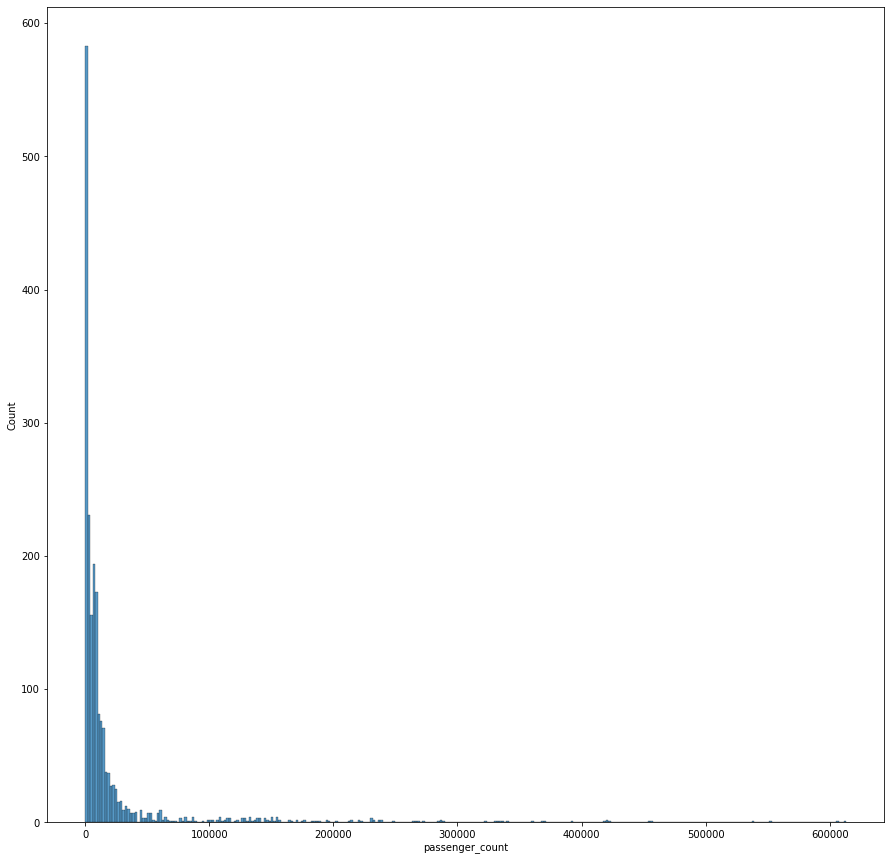

In [26]:
plt.figure(figsize = (15,15))
sns.histplot(results_df, x = "passenger_count")
plt.show()

In [27]:
og_df = results_df.copy()

## encoding the categorical variables

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [29]:
results_df.columns

Index(['activity_period', 'operating_airline', 'published_airline',
       'geo_summary', 'geo_region', 'activity_type_code',
       'price_category_code', 'terminal', 'boarding_area', 'passenger_count'],
      dtype='object')

In [30]:
results_df['operating_airline'] = results_df['operating_airline'].astype('string')
results_df['published_airline'] = results_df['published_airline'].astype('string')
results_df['geo_summary'] = results_df['geo_summary'].astype('string')
results_df['geo_region'] = results_df['geo_region'].astype('string')
results_df['activity_type_code'] = results_df['activity_type_code'].astype('string')
results_df['price_category_code'] = results_df['price_category_code'].astype('string')
results_df['terminal'] = results_df['terminal'].astype('string')
results_df['boarding_area'] = results_df['boarding_area'].astype('string')



In [31]:
encoded_df = MultiColumnLabelEncoder(columns = ['operating_airline', 'published_airline',
       'geo_summary', 'geo_region',
       'activity_type_code', 'price_category_code', 'terminal',
       'boarding_area']).fit_transform(results_df)

In [32]:
encoded_df.dtypes

activity_period        datetime64[ns]
operating_airline               int64
published_airline               int64
geo_summary                     int64
geo_region                      int64
activity_type_code              int64
price_category_code             int64
terminal                        int64
boarding_area                   int64
passenger_count                 int64
dtype: object

In [33]:
df = encoded_df.drop(columns =["activity_period"])

In [34]:
encoded_df.sample(4)

,activity_period,operating_airline,published_airline,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count
1316,2019-12-01,26,25,1,1,2,1,0,6,2411
594,2020-06-01,46,51,0,7,1,1,3,5,44399
340,2020-09-01,55,51,1,6,0,1,0,6,1490
22,2020-12-01,5,5,1,4,1,1,0,0,1214


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f630cb6d210>,
      dtype=object)

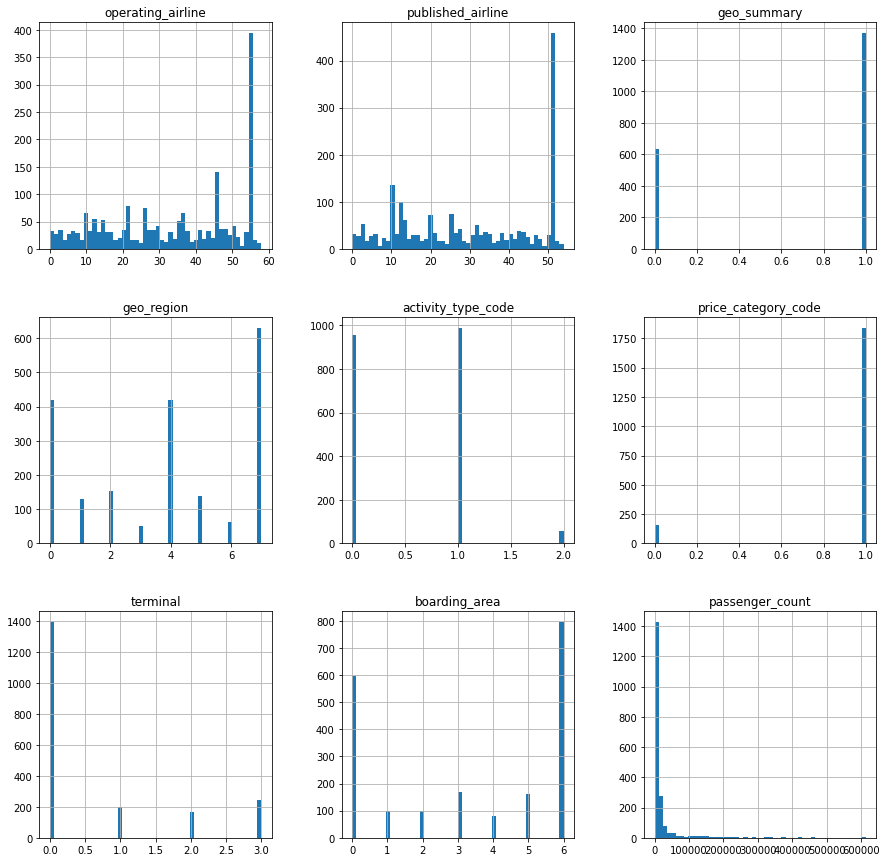

In [35]:
encoded_df.hist(bins= 50, figsize=(15,15))

### Removing Outliers using scatter plot

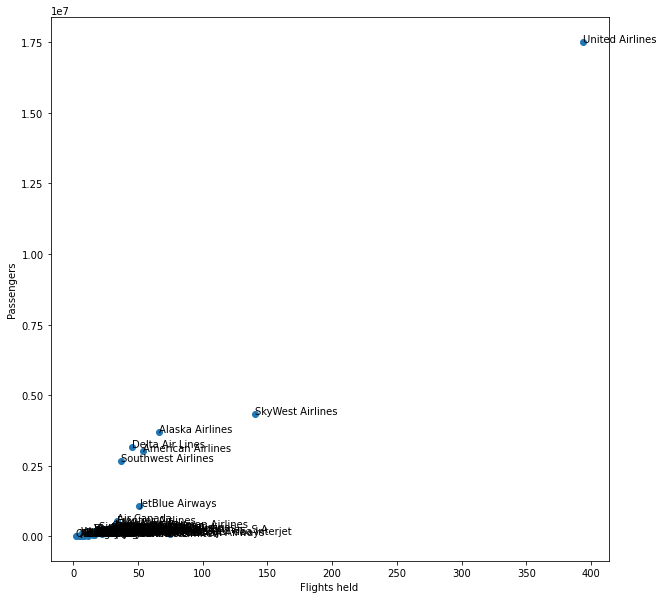

In [36]:
airline_count = og_df["operating_airline"].value_counts()
airline_count.sort_index(inplace=True)
passenger_count = og_df.groupby("operating_airline").sum()["passenger_count"]
passenger_count.sort_index(inplace=True)
from sklearn.preprocessing import scale
x = airline_count.values
y = passenger_count.values
plt.figure(figsize = (10,10))
plt.scatter(x, y)
plt.xlabel("Flights held")
plt.ylabel("Passengers")
for i, txt in enumerate(airline_count.index.values):
    a = plt.gca()
    plt.annotate(txt, (x[i], y[i]))
plt.show()

We can see that most of the airlines are grouped together in the bottom left part of the plot, some are above them, and our outlier United Airlines 

Lets remove that

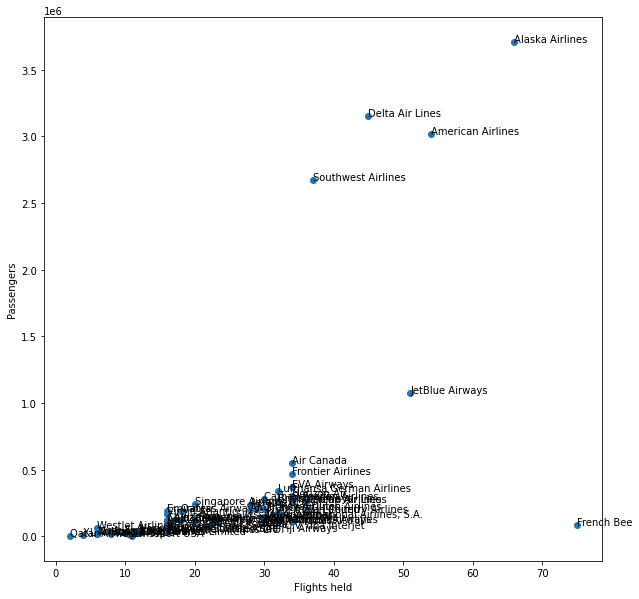

In [38]:
df_1 = airline_count + passenger_count
df_1.sort_values(ascending = False, inplace = True)
outliers = df_1.head(1).index.values
airline_count = airline_count.drop(outliers)
airline_count.sort_index(inplace=True)
passenger_count = passenger_count.drop(outliers)
passenger_count.sort_index(inplace = True)
x = airline_count.values
y = passenger_count.values
plt.figure(figsize = (10,10))
plt.scatter(x, y)
plt.xlabel("Flights held")
plt.ylabel("Passengers")
for i, txt in enumerate(airline_count.index.values):
    a = plt.gca()
    plt.annotate(txt, (x[i], y[i]))
plt.show()

# Model developement

I have added the name of clustering algorithm -- no of suitable clusters found on application as heading

##**M1 Kmeans** -- 5 clusters

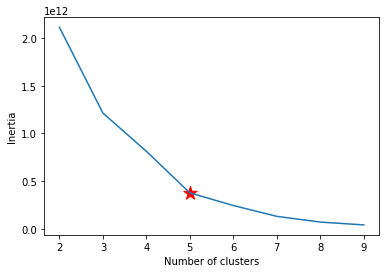

In [39]:
from sklearn.cluster import KMeans
X = np.array(list(zip(x,y)))
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(2,10), inertias)
plt.scatter(5,inertias[3], s = 200, c = 'red', marker='*')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [40]:
##It gives an idea of how well the objects are classified taking that number of clusters
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score (X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.9349696578489106)
For n_clusters = 3, silhouette score is 0.7623675580787167)
For n_clusters = 4, silhouette score is 0.7377913462851029)
For n_clusters = 5, silhouette score is 0.5730058945503386)
For n_clusters = 6, silhouette score is 0.5732947745688971)
For n_clusters = 7, silhouette score is 0.5490514750066843)
For n_clusters = 8, silhouette score is 0.5452973502971197)
For n_clusters = 9, silhouette score is 0.5798067456555569)
For n_clusters = 10, silhouette score is 0.590518547706666)
For n_clusters = 11, silhouette score is 0.5770517301604999)
For n_clusters = 12, silhouette score is 0.5667463427740966)
For n_clusters = 13, silhouette score is 0.5522042954486345)
For n_clusters = 14, silhouette score is 0.535604303119725)


# **Clusters = 5**

From both silhoutte score and Elbow method, number of clusters is 5

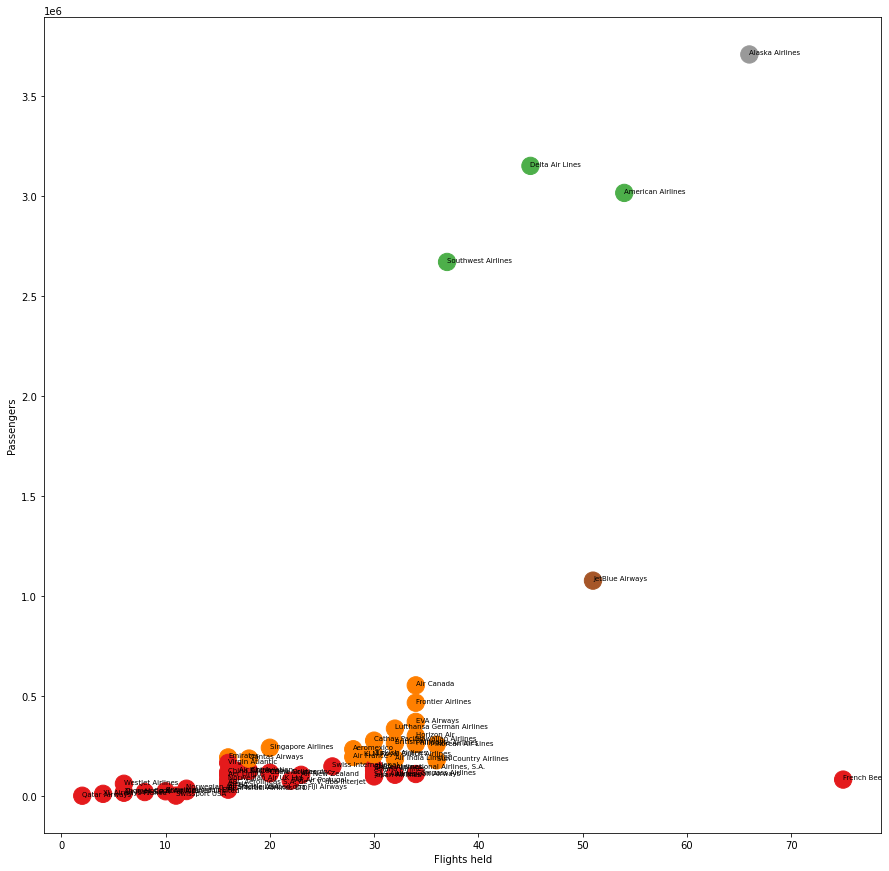

In [41]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
pred = y_kmeans
plt.figure(figsize = (15,15))
plt.xlabel("Flights held")
plt.ylabel("Passengers")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=300, cmap='Set1')
for i, txt in enumerate(airline_count.index.values):
    plt.annotate(txt, (X[i,0], X[i,1]), size = 7)
plt.show()

#Visualizing

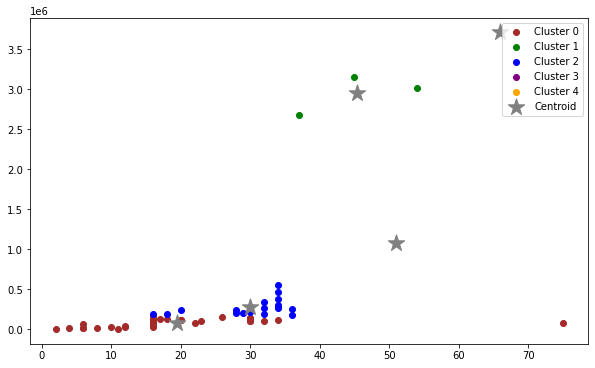

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'gray', label = 'Centroid', marker='*')
plt.legend()

### what's happening in the background

In [43]:
def plot_k_means_progress(centroid_history,n_clusters, centroid_sets, cluster_color):
    """
    This function will plot the path taken by the centroids
    
    I/P:
    * centroid_history: 2D array of centroids. Each element represent the centroid coordinate. 
      If there are 5 clusters then first set contains initial cluster cordinates
      (i.e. first 5 elements) and then k_means loop will keep appending new cluster coordinates for each iteration
    * n_clusters: Total number of clusters to find
    * centroid_sets: At the start we set random values as our first centroid set. K-Means loop will keep adding 
    new centroid sets to centroid_history. Since we are ploting the path of centroid locations, centroid set value 
    will be K-Means loop iteration number plus 1 for initial centroid set. 
    So its value will be from 2 to K-Means loops max iter plus 1
    * cluster_color: Just to have same line and cluster color
    
    O/P: Plot the centroid path
    """
    c_x = [] # To store centroid X coordinated
    c_y=[]   # To store the centroid Y coordinates
    for i in range(0, n_clusters):
        cluster_index = 0
        for j in range(0, centroid_sets):
            c_x = np.append(c_x, centroid_history[:,0][i + cluster_index])
            c_y = np.append(c_y, centroid_history[:,1][i + cluster_index])
            cluster_index = cluster_index + n_clusters
            # if there are 5 clusters then first set contains initial cluster cordinates and then k_means loop will keep appending new cluster coordinates for each iteration
        
        plt.plot(c_x, c_y, c= cluster_color['c_' + str(i)], linestyle='--')
        
        # Reset coordinate arrays to avoid continuous lines
        c_x = []
        c_y=[]

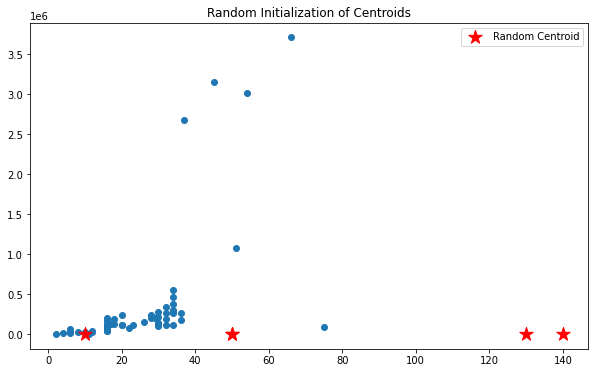

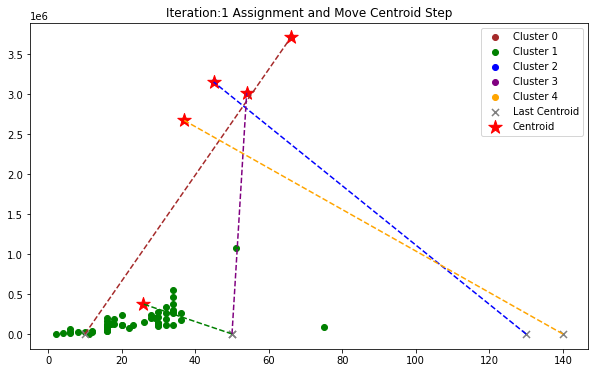

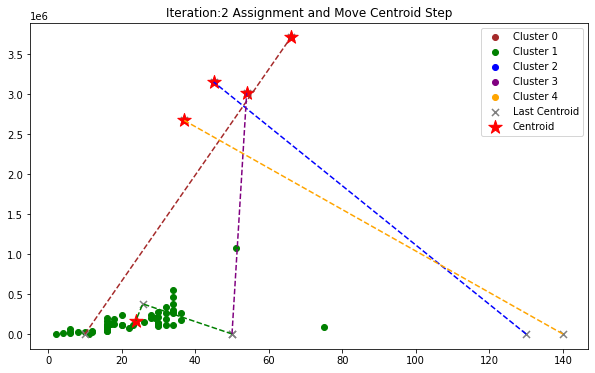

In [44]:
plt.figure(figsize=(10,6))

# Random Initialization of Centroids
plt.scatter(x,y)
initial_centroid = np.array([[10, 2], [50,100], [130,20], [50,15], [140,100]])

plt.scatter(initial_centroid[:,0], initial_centroid[:, 1],s = 200, c = 'red', label = 'Random Centroid', marker='*')
plt.legend()
plt.title('Random Initialization of Centroids')

# K-Means loop of assignment and move centroid steps
centroid_history = []
centroid_history = initial_centroid
#
cluster_color= {'c_0':'brown','c_1':'green','c_2':'blue','c_3':'purple','c_4':'orange'}
n_clusters = 5
for i in range(1,3):
    kmeans= KMeans(n_clusters, init= initial_centroid, n_init= 1, max_iter= i, random_state = 42)  #n_init= 1 since our init parameter is array
    
    # Compute cluster centers and predict cluster index for each sample
    pred = kmeans.fit_predict(X)

    plt.figure(figsize=(10,6))
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
    plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
    plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
    plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4') 
    
    plt.scatter(centroid_history[:,0], centroid_history[:, 1],s = 50, c = 'gray', label = 'Last Centroid', marker='x')
    
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 200, c = 'red', label = 'Centroid', marker='*')
    
    centroid_history = np.append(centroid_history, kmeans.cluster_centers_, axis=0)
    
    
    plt.legend()
    plt.title('Iteration:' + str(i) + ' Assignment and Move Centroid Step')
    
    centroid_sets = i + 1 # Adding one for initial set of centroids
    plot_k_means_progress(centroid_history,n_clusters, centroid_sets, cluster_color)

**The clustering is highly dependent on passenger count so I tried removing that and performed clustering**

## M2 Affinity Propagation - 6 clusters

 “affinity propagation,” which takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges

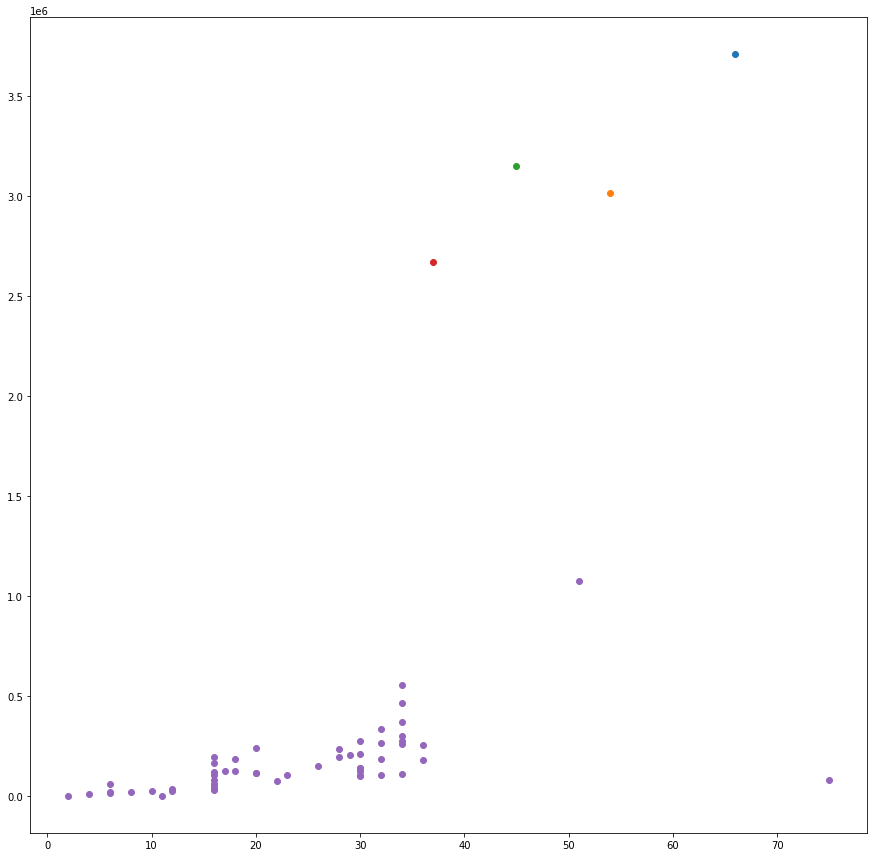

In [45]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
plt.figure(figsize=(15,15))
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

# M3 Agglomerative Clustering  -- After analysis found 3 clusters
Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

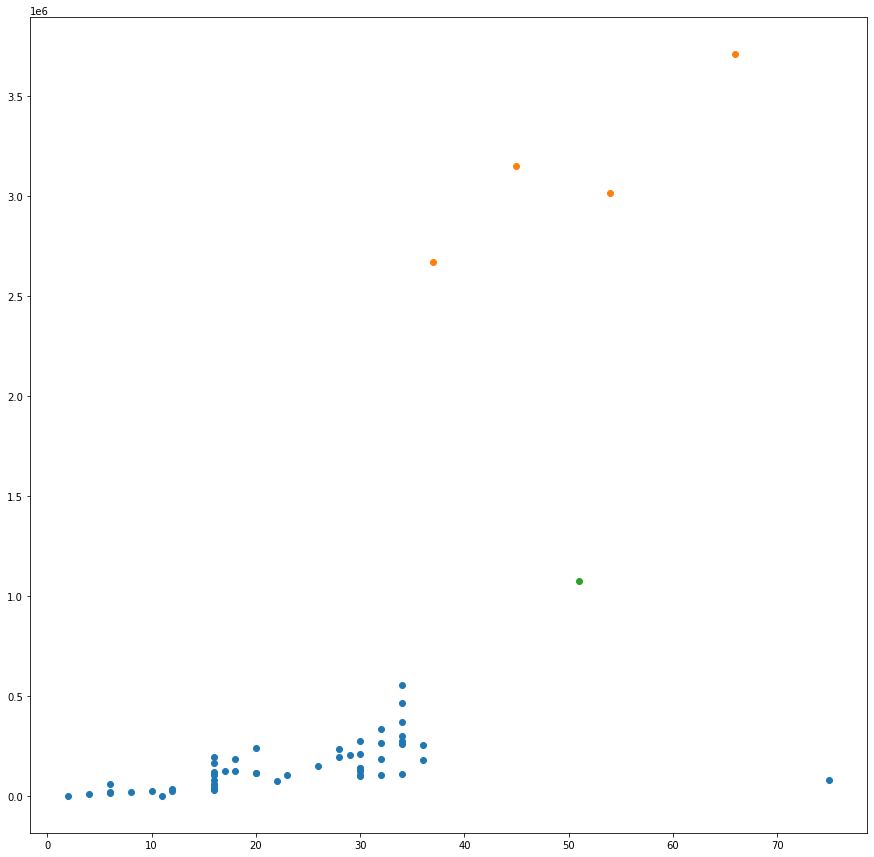

In [46]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
plt.figure(figsize=(15,15))
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

#DBSCAN
DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

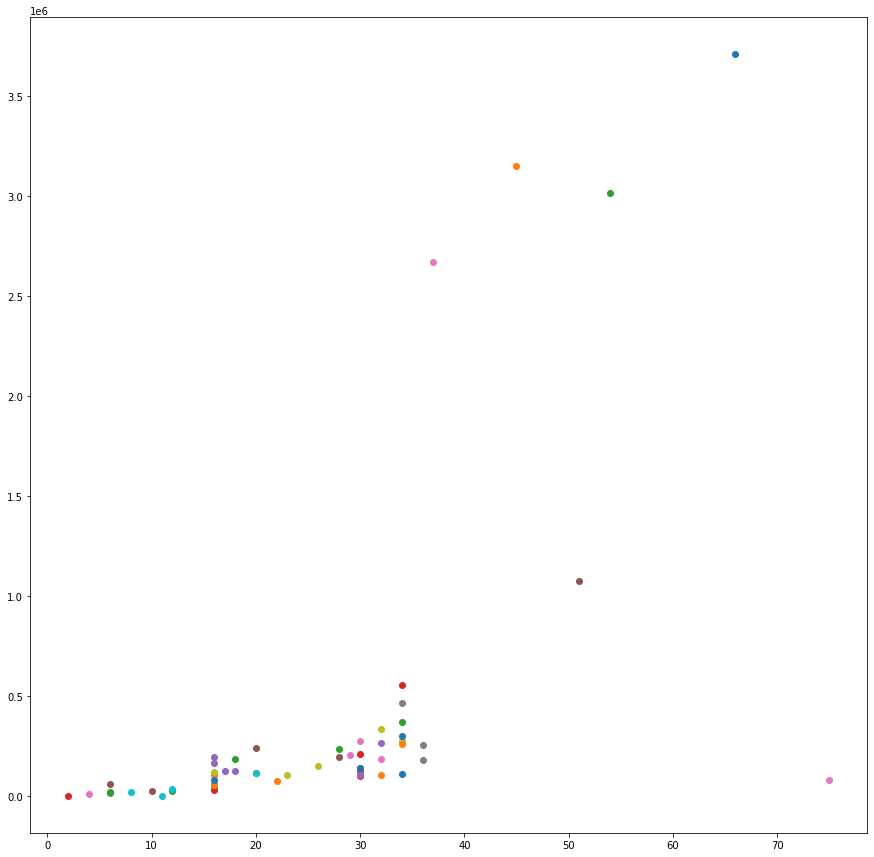

In [47]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.5, min_samples=1)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
plt.figure(figsize=(15,15))
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
  	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

#Mean Shift - 5 clusters
Mean shift clustering involves finding and adapting centroids based on the density of examples in the feature space.

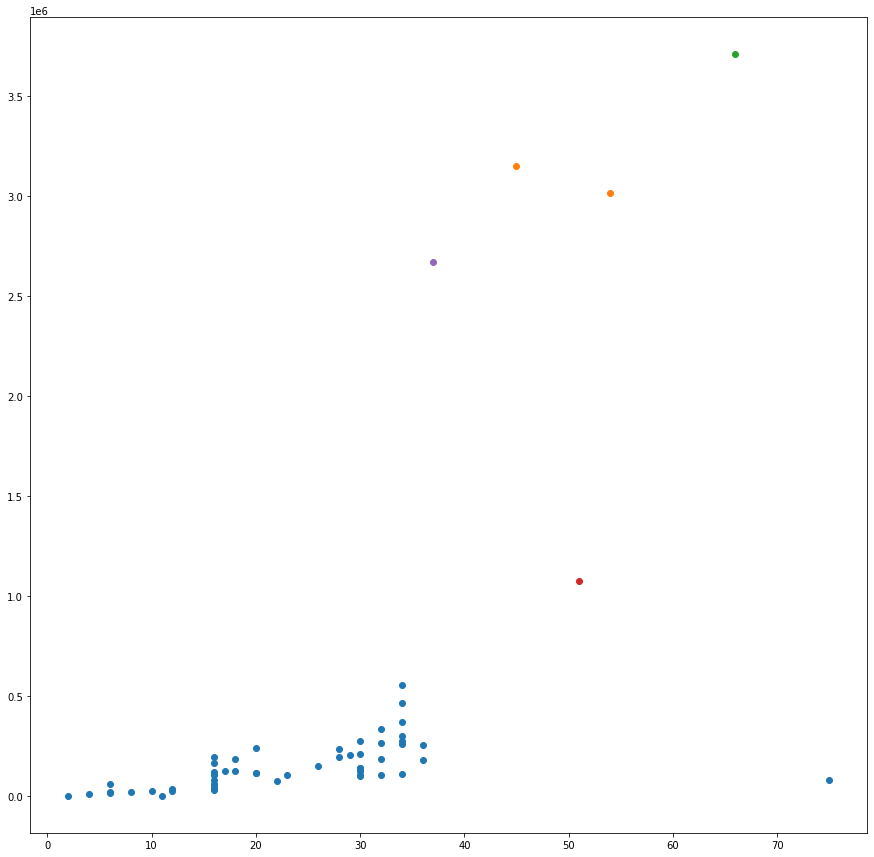

In [48]:
from sklearn.cluster import MeanShift
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
plt.figure(figsize=(15,15))
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
  	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot

#Gaussian Mixture Model - 2 clusters

A Gaussian mixture model summarizes a multivariate probability density function with a mixture of Gaussian probability distributions

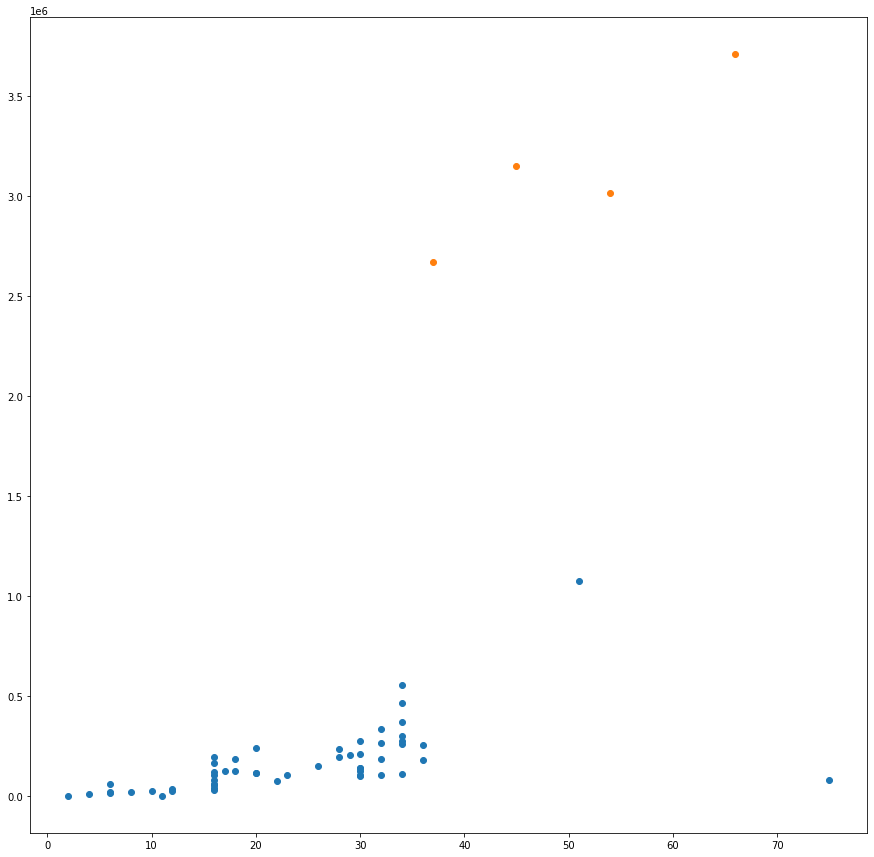

In [49]:
from sklearn.mixture import GaussianMixture
# define the model
model = GaussianMixture(n_components=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
plt.figure(figsize=(15,15))
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
  	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot